## Home Work

In [46]:
import tqdm
import matplotlib.pyplot as plt
import graphviz
import numpy as np
import Frozen_Lake as fl

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
def init_policy(env):

    actions_set = set()

    row_max = 0
    col_max = 0
    for state in env.get_all_states():
        actions_set.update(env.get_possible_actions(state))
        row_max = max(row_max, state[0])
        col_max = max(col_max, state[1])

    actions = {i:action for i,action in enumerate(sorted(actions_set))}

    policy = np.zeros((row_max+1, col_max+1, len(actions_set)))

#     print('policies    |states')
    for y,x in env.get_all_states():
        possible_actions = env.get_possible_actions((y,x))
        if len(possible_actions)!=0:
            uniform_prob = 1/len(possible_actions)
            policy[y][x] = uniform_prob
#         print(policy[y][x], y, x,)
    return policy, list(sorted(actions_set))

def init_values(policy):
     return np.zeros((policy.shape[0]*policy.shape[1],))

def policy_evaluation_step(policy, values, gamma):
    new_values = np.zeros(policy.shape[0]*policy.shape[1])

    for state in env.get_all_states():
        state_y, state_x = state
        idx_state_values = state_y*policy.shape[0] + state_x
        for action in env.get_possible_actions(state):
            policy_prob = policy[state_y][state_x][actions_dict[action]]
            for next_state in env.get_next_states(state, action):
                next_state_y, next_state_x = next_state
                idx_next_state_values = next_state_y*policy.shape[0] + next_state_x

                # reward
                reward = env.get_reward(state, action, next_state)
#                 total_reward += reward
                # value
                trans_prob = env.get_transition_prob(state, action, next_state)
                next_value = values[idx_next_state_values]
#                 total_value += gamma * trans_prob * value_func
                new_values[idx_state_values] += \
                    policy_prob * trans_prob * (reward + gamma * next_value)
#             new_values[idx_state_values] += \
#                 policy_prob * (total_reward + total_value)

    return new_values

def Q(policy, values, actions_dict):
    new_q = np.zeros(policy.shape)

    for state in env.get_all_states():
        state_y, state_x = state
        # actions_dict[action]
        for action in env.get_possible_actions(state):
            for next_state in env.get_next_states(state, action):
                next_state_y, next_state_x = next_state

                reward = env.get_reward(state, action, next_state)
                prob = env.get_transition_prob(state, action, next_state)
                next_value = values[next_state_y*policy.shape[0]+next_state_x]

                new_q[state_y][state_x][actions_dict[action]] \
                    += prob *(reward + gamma * next_value)
    return new_q

def policy_improvement(policy, q):
    next_policy = np.zeros(policy.shape)
    for state in env.get_all_states():
        state_y,state_x = state

        idx_action = np.argmax(q[state_y][state_x])
        next_policy[state_y][state_x][idx_action] = 1
    return next_policy

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
env = fl.FrozenLakeEnv(map_name="4x4")
env.reset()

(0, 0)

In [166]:
policy,actions_set = init_policy(env)
actions_dict ={action:i for i,action in enumerate(sorted(actions_set))}
values = init_values(policy)
values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
for action in actions_set:
    print(action, actions_dict[action])

down 0
left 1
right 2
up 3


In [84]:
import tqdm

In [85]:
actions_set

['down', 'left', 'right', 'up']

In [151]:
L = 100
K = 100
gamma = 0.8

values = init_values(policy)
for k in tqdm.tqdm(range(K), position=0):
    for l in range(L):
        values = policy_evaluation_step(policy, values, gamma)
    q = Q(policy, values, actions_dict)
    policy = policy_improvement(policy, q)

policy


100%|██████████| 100/100 [00:06<00:00, 16.46it/s]


array([[[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]])

In [153]:
actions_arr = [0]*4
for k,v in actions_dict.items():
    actions_arr[v]=k
actions_arr

field = []
row = []
for y, x in env.get_all_states():
    row.append(actions_arr[np.argmax(policy[x][y])][0])
    if x == 3:
        field.append(' '.join(row))
        row = []
print('\n'.join(field))

d d r d
r d d r
d d d r
l d d d


In [ ]:
def run_test(policy):
    total_reward = 0
    state = env.reset()
    
    for i in range(100):
        possible_actions = list(sorted(env.get_possible_actions(state)))
#         print(possible_actions)
        state_y, state_x = state
        actions_distr = policy[state_y][state_x]

        action = np.random.choice(possible_actions,p=actions_distr)
        state, reward, done, _ = env.step(action)
#         print(state, reward, done, _,action, actions_distr)
#         env.render()
        total_reward += reward

        if done: break
    return total_reward, i

In [185]:
t = tqdm.tqdm(position=0)

0it [00:00, ?it/s]

In [170]:
t.reset()


/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
0it [00:00, ?it/s]

In [195]:
t.set_postfix({'start':0})

7it [04:27,  3.67it/s, start=0]

In [201]:
at.update()

NameError: name 'at' is not defined

In [288]:
def stats(g, r, s):
    sucess = np.sum(r[r==1])/len(r)
    fail = 1 - sucess
    sucess_len = np.mean(s[r==1])
    fail_len = np.mean(s[r==0])
    return g, sucess, fail, sucess_len, fail_len

In [289]:
def experiment(L, K, NN, gamma, tqdm_train, tqdm_test):

    tqdm_train.reset()
    tqdm_test.reset()
    # gamma = 0.8
    policy,actions_set = init_policy(env)
    actions_dict ={action:i for i,action in enumerate(sorted(actions_set))}
    values = init_values(policy)
    values
    for k in range(K):
        tqdm_train.update()
        for l in range(L):
            values = policy_evaluation_step(policy, values, gamma)
        q = Q(policy, values, actions_dict)
        policy = policy_improvement(policy, q)
    policy
    runs = []
    for _ in range(NN):
        runs.append(run_test())
        tqdm_test.update()
    runs = np.array(runs)
    rewards, steps = runs[::,0], runs[::,1]
    return rewards, steps

In [290]:
def experiments(L, K, NN, gammas):
    exps=[]
    tqdm_gammas = tqdm.tqdm_notebook(total=len(gammas), desc='gammas', position=0)
    tqdm_train = tqdm.tqdm_notebook(total=K, desc='train', position=1)
    tqdm_test  = tqdm.tqdm_notebook(total=NN, desc='test', position=2)
    for gamma in gammas:
        tqdm_gammas.set_description('gamma:'+f"{gamma:0.5}")
        rewards, steps = experiment(L, K, NN, gamma, tqdm_train, tqdm_test)
        exps.append(stats(gamma, rewards, steps))
        tqdm_gammas.update()
    return exps

In [ ]:
gammas = np.linspace(0,1, num=30)
gammas

NN = 10000
L = 100
K = 100
exps = experiments(L, K, NN, gammas)

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


gammas:   0%|          | 0/30 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/10000 [00:00<?, ?it/s]

In [295]:
exps = np.array(exps)


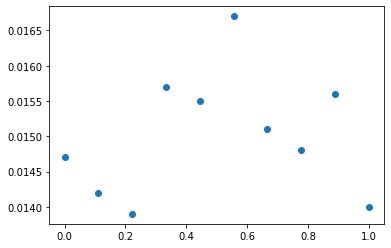

In [296]:
plt.scatter(exps[::,0],exps[::,1])

In [297]:
exps

array([[ 0.        ,  0.0147    ,  0.9853    , 11.96598639,  6.61230082],
       [ 0.11111111,  0.0142    ,  0.9858    , 12.92957746,  6.57892067],
       [ 0.22222222,  0.0139    ,  0.9861    , 12.33093525,  6.65175946],
       [ 0.33333333,  0.0157    ,  0.9843    , 12.21656051,  6.63679772],
       [ 0.44444444,  0.0155    ,  0.9845    , 11.75483871,  6.5523616 ],
       [ 0.55555556,  0.0167    ,  0.9833    , 13.4251497 ,  6.5096105 ],
       [ 0.66666667,  0.0151    ,  0.9849    , 11.96688742,  6.66422987],
       [ 0.77777778,  0.0148    ,  0.9852    , 12.38513514,  6.60535932],
       [ 0.88888889,  0.0156    ,  0.9844    , 12.30128205,  6.51787891],
       [ 1.        ,  0.014     ,  0.986     , 12.40714286,  6.64371197]])

In [230]:
len(exps)

3

In [246]:
g, r, s = exps[0]

ValueError: too many values to unpack (expected 3)

In [233]:
g

0.0

In [245]:
stats(g, r, s)

(0.012, 0.988, 11.666666666666666, 6.618421052631579)

In [158]:
def test_policy(policy):
    total_reward = 0
    state = env.reset()
    for i in range(100):
        possible_actions = list(sorted(env.get_possible_actions(state)))
#         print(possible_actions)
        state_y, state_x = state
        actions_distr = policy[state_y][state_x]

        action = np.random.choice(possible_actions,p=actions_distr)
        state, reward, done, _ = env.step(action)
#         print(state, reward, done, _,action, actions_distr)
#         env.render()
        total_reward += reward

        if done: break
    return total_reward, i

In [126]:
NN = 10000
runs = [run_test()for _ in tqdm.tqdm(range(NN))]
runs = np.array(runs)

100%|██████████| 10000/10000 [00:06<00:00, 1459.44it/s]


In [114]:
import matplotlib.pyplot as plt

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
success = np.sum(runs[::,0]==1.)/NN
fail = 1-success
print(success, fail)

0.7276 0.2724


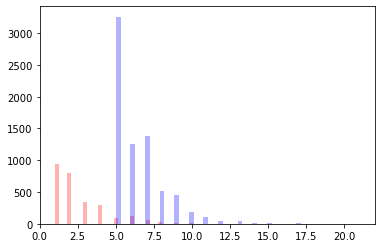

In [128]:
plt.hist(runs[runs[::,0]==0.][::,1], color='red' , alpha=0.3, bins=50)
plt.hist(runs[runs[::,0]==1.][::,1], color='blue', alpha=0.3, bins=50)
plt.show()

In [40]:
total_reward

1.0

In [61]:
float('Inf')

inf

In [54]:
from Frozen_Lake import FrozenLakeEnv
import numpy as np
import time

env = FrozenLakeEnv()

def init_policy():
    policy = {}
    for state in env.get_all_states():
        policy[state] = {}
        for action in env.get_possible_actions(state):
            policy[state][action] = 1 / len(env.get_possible_actions(state))
    return policy

def policy_evaluation_step(policy, values, gamma):
    q_values = get_q_values(values, gamma)
    
    new_values = {}
    for state in env.get_all_states():
        new_values[state] = 0
        for action in env.get_possible_actions(state):
            new_values[state] += policy[state][action] * q_values[state][action]
    
    return new_values

def init_values():
    return {state: 0 for state in env.get_all_states()}

def get_q_values(values, gamma):
    q_values = {}
    for state in env.get_all_states():
        q_values[state] = {}
        for action in env.get_possible_actions(state):
            q_values[state][action] = 0
            for next_state in env.get_next_states(state, action):
                reward = env.get_reward(state, action, next_state)
                transition_prob = env.get_transition_prob(state, action, next_state)
                next_value = values[next_state]
                q_values[state][action] += transition_prob * (reward + gamma * next_value)
    return q_values

def policy_evaluation(policy, gamma, evaluation_step_n):
    values = init_values()
    for _ in range(evaluation_step_n):
        values = policy_evaluation_step(policy, values, gamma)
    q_values = get_q_values(values, gamma)
    return q_values

def policy_improvement(q_values):
    new_policy = {}
    for state in env.get_all_states():
        new_policy[state] = {}
        max_action = None
        max_q_value = float('-inf')
        for action in env.get_possible_actions(state):
            if q_values[state][action] > max_q_value:
                max_q_value = q_values[state][action]
                max_action = action
        for action in env.get_possible_actions(state):
            new_policy[state][action] = 1 if action == max_action else 0
    return new_policy


iteration_n = 100
evaluation_step_n = 100
gamma = 0.9

policy = init_policy()
for k in tqdm.tqdm(range(iteration_n), position=0):
    
    q_values = policy_evaluation(policy, gamma, evaluation_step_n)
    policy = policy_improvement(q_values)
    

total_reward = 0
state = env.reset()
for _ in range(100):
    action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
    state, reward, done, _ = env.step(action)
    
    time.sleep(1)
    env.render()
    
    total_reward += reward
    
    if done or env.is_terminal(state):
        break

print(f'total reward = {total_reward}')

100%|██████████| 100/100 [00:04<00:00, 24.76it/s]


SFFF
*HFH
FFFH
HFFG

SFFF
FHFH
*FFH
HFFG

SFFF
FHFH
F*FH
HFFG

SFFF
FHFH
FFFH
H*FG

SFFF
FHFH
FFFH
H*FG

SFFF
FHFH
FFFH
HF*G



KeyboardInterrupt: 

In [10]:
def stats(g, r, s):
    sucess = np.sum(r[r==1])/len(r)
    fail = 1 - sucess
    sucess_len = np.mean(s[r==1])
    fail_len = np.mean(s[r==0])
    return g, sucess, fail, sucess_len, fail_len

In [60]:
def experiment(L, K, NN, gamma, tqdm_train, tqdm_test):

    tqdm_train.reset()
    tqdm_test.reset()
    # gamma = 0.8
    policy = init_policy()
    for k in range(K):
        q_values = policy_evaluation(policy, gamma, L)
#         q_values = policy_evaluation(policy, gamma, evaluation_step_n)
        policy = policy_improvement(q_values)
    runs = []
    for _ in range(NN):
        runs.append(run_test(policy))
        tqdm_test.update()
    runs = np.array(runs)
    rewards, steps = runs[::,0], runs[::,1]
    return rewards, steps

In [61]:
def stats(g, r, s):
    sucess = np.sum(r[r==1])/len(r)
    fail = 1 - sucess
    sucess_len = np.mean(s[r==1])
    fail_len = np.mean(s[r==0])
    return g, sucess, fail, sucess_len, fail_len

In [62]:
def run_test(policy):
    
    total_reward = 0
    state = env.reset()
    for i in range(100):
        action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
        state, reward, done, _ = env.step(action)
        total_reward += reward

        if done or env.is_terminal(state):
            break

    return total_reward, i


In [63]:
def experiments(L, K, NN, gammas):
    exps=[]
    tqdm_gammas = tqdm.tqdm_notebook(total=len(gammas), desc='gammas', position=0)
    tqdm_train = tqdm.tqdm_notebook(total=K, desc='train', position=1)
    tqdm_test  = tqdm.tqdm_notebook(total=NN, desc='test', position=2)
    for gamma in gammas:
        tqdm_gammas.set_description('gamma:'+f"{gamma:0.5}")
        rewards, steps = experiment(L, K, NN, gamma, tqdm_train, tqdm_test)
        exps.append(stats(gamma, rewards, steps))
        tqdm_gammas.update()
    return exps

In [64]:
gammas = np.linspace(0.9880,0.998, num=10)
gammas

array([0.988     , 0.98911111, 0.99022222, 0.99133333, 0.99244444,
       0.99355556, 0.99466667, 0.99577778, 0.99688889, 0.998     ])

In [65]:
NN = 5000
L = 100
K = 100
exps = experiments(L, K, NN, gammas)

/home/shmalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


gammas:   0%|          | 0/10 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

test:   0%|          | 0/5000 [00:00<?, ?it/s]

In [66]:
exps = np.array(exps)

(0.0, 1.0)

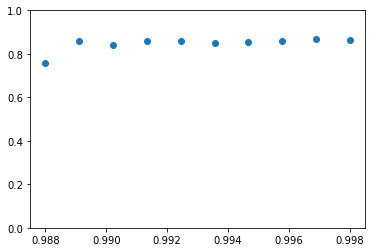

In [68]:
plt.scatter(exps[::,0],exps[::,1])
plt.ylim((0,1))